In [1]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import os   
import random
import math
import seaborn as sns
import scipy.stats as stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from faker import Faker

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


In [32]:
movies = pd.read_csv('\\Users\\Andrea\\movies.csv')
movies.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [11]:
movies.shape

(7668, 15)

In [3]:
movies.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [14]:
movies.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [ ]:
# Count the NaN values on each column

In [3]:
for col in movies.columns:
    null = movies[col].count()
    print(col,null)

name 7668
rating 7591
genre 7668
year 7668
released 7666
score 7665
votes 7665
director 7668
writer 7665
star 7667
country 7665
budget 5497
gross 7479
company 7651
runtime 7664


In [4]:
for col in movies.columns:
    null = movies[col].isnull().sum()
    print(col,null)

name 0
rating 77
genre 0
year 0
released 2
score 3
votes 3
director 0
writer 3
star 1
country 3
budget 2171
gross 189
company 17
runtime 4


In [7]:
for col in movies.columns:
    null = np.mean(movies[col].isnull())
    print('{} - {}%'.format(col,null))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [ ]:
# I could remove NaN values and replace them with the mean

In [ ]:
movies.dropna(subset=[], inplace=True)

In [ ]:
mean = movies[].mean()
mean_revenue = np.where(movies[].isnull(), 
                       mean,                       
                       movies[])  
movies[] = mean_revenue
movies.head()

In [ ]:
# Sort values

In [5]:
movies.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [ ]:
# Display all rows

In [11]:
pd.set_option('display.max_rows', None)

In [ ]:
# Show values of a column without duplicates

In [30]:
movies['genre'].drop_duplicates().sort_values(ascending=False)

202     18
262     17
7600    16
59      15
156     14
1382    13
7613    12
162     11
5       10
474      9
23       8
40       7
0        6
14       5
3        4
7        3
71       2
1        1
2        0
Name: genre, dtype: int8

In [ ]:
# Drop duplicates

In [6]:
movies['genre'] = movies['genre'].drop_duplicates()

In [14]:
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


Text(0, 0.5, 'Gross earnings')

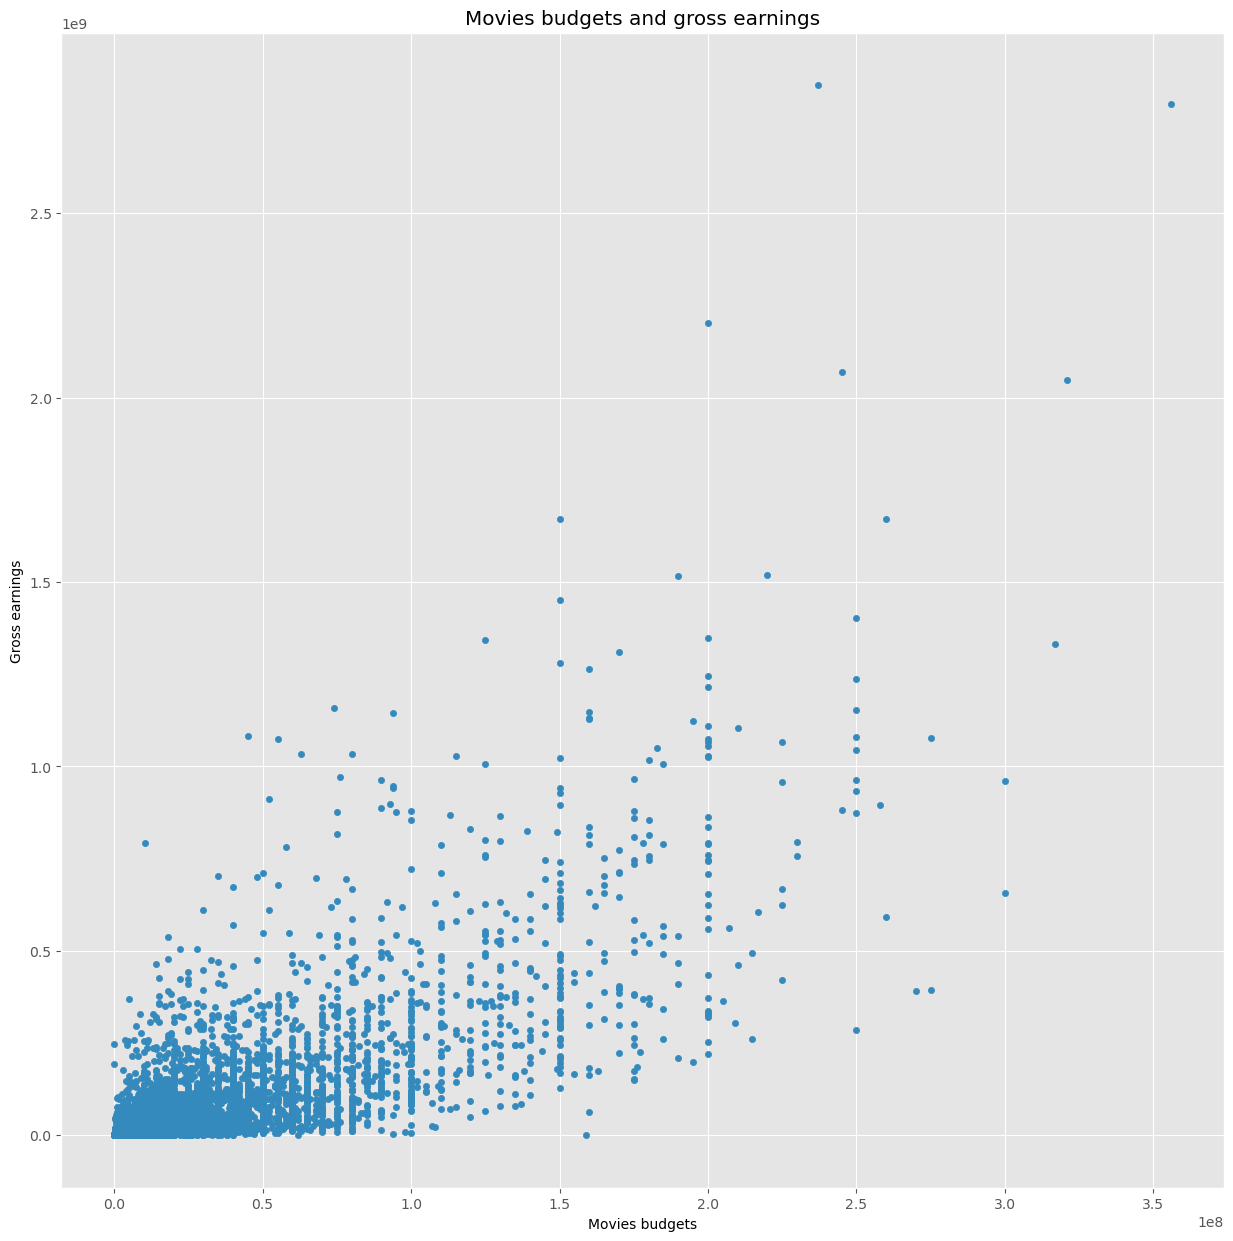

In [15]:
# Scatter plot: budget vs gross

movies.plot(kind="scatter",     # Create a scatterplot
              x="budget",          # Put carat on the x axis
              y="gross",          # Put price on the y axis
              figsize=(15,15))

 # xlim=(0,10),
 # ylim=(0,1000)

plt.title('Movies budgets and gross earnings' )
plt.xlabel('Movies budgets')
plt.ylabel('Gross earnings')

Text(0, 0.5, 'Gross earnings')

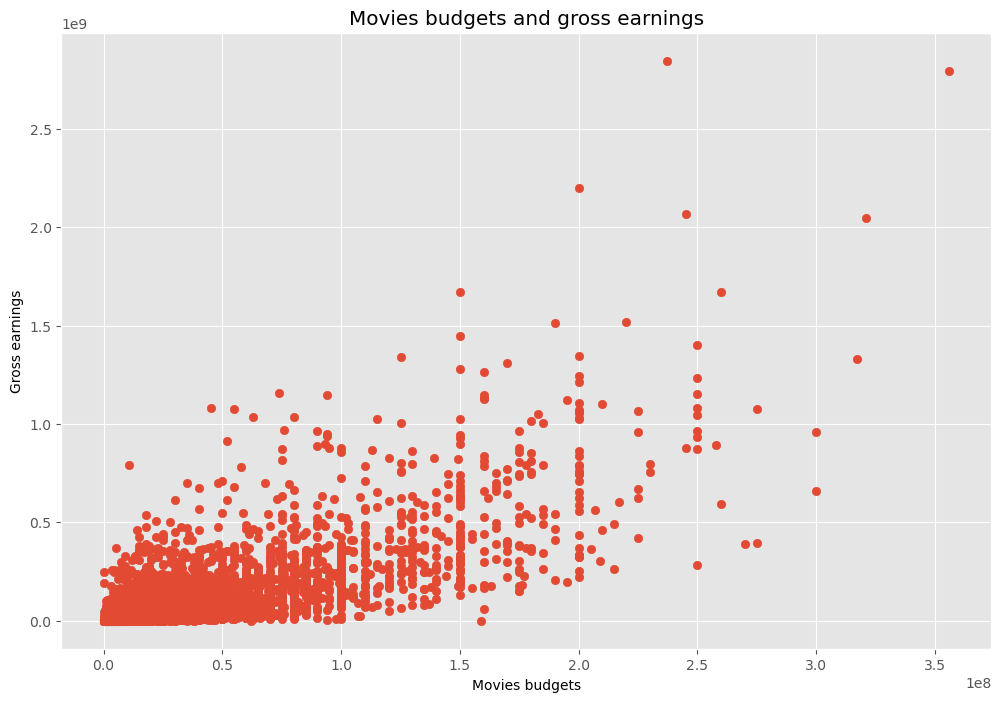

In [16]:
# Different scatter plot: budget vs gross

plt.scatter(x=movies['budget'], y=movies['gross'])
plt.title('Movies budgets and gross earnings' )
plt.xlabel('Movies budgets')
plt.ylabel('Gross earnings')

<Axes: xlabel='budget', ylabel='gross'>

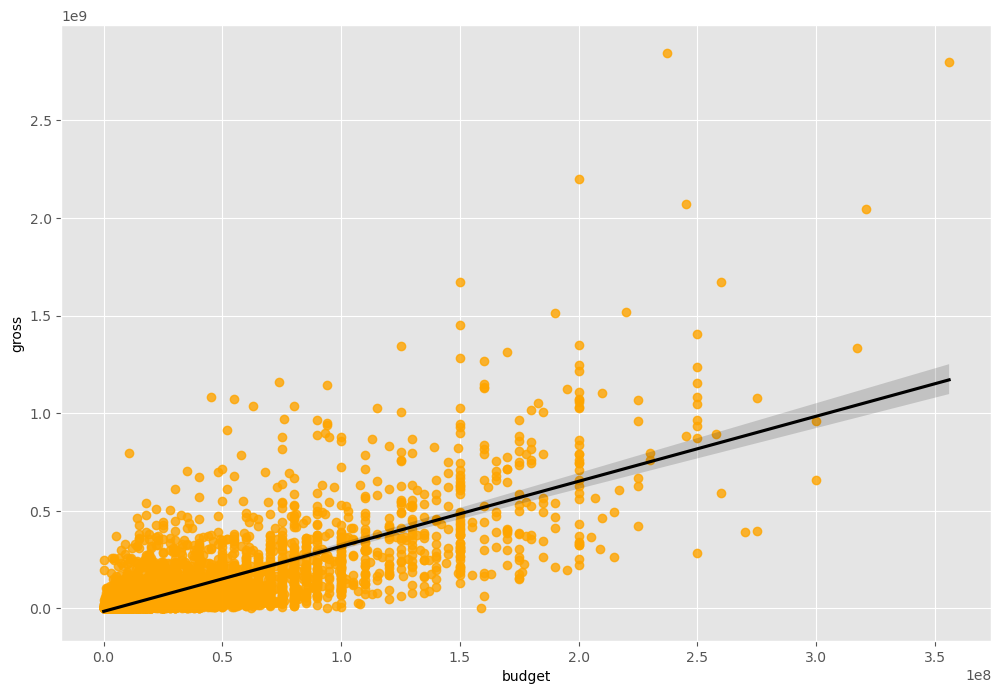

In [9]:
# Linear regression

sns.regplot(x='budget', y='gross', data=movies, scatter_kws={'color':'orange'}, line_kws={'color':'black'})

In [ ]:
# Different methods to measure correlation 

In [12]:
movies.corr(method='kendall')

C:\Users\Andrea\AppData\Local\Temp\ipykernel_30292\76517693.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  movies.corr(method='kendall')


,year,score,votes,budget,gross,runtime
year,1.000000,0.067652,0.331465,0.224120,0.200618,0.097184
score,0.067652,1.000000,0.300115,-0.000566,0.086046,0.283611
votes,0.331465,0.300115,1.000000,0.353702,0.548899,0.198240
budget,0.224120,-0.000566,0.353702,1.000000,0.512637,0.235483
gross,0.200618,0.086046,0.548899,0.512637,1.000000,0.168933
runtime,0.097184,0.283611,0.198240,0.235483,0.168933,1.000000


In [13]:
movies.corr() #Pearson

C:\Users\Andrea\AppData\Local\Temp\ipykernel_30292\4197049095.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  movies.corr() #Pearson


,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


In [14]:
movies.corr(method='spearman')

C:\Users\Andrea\AppData\Local\Temp\ipykernel_30292\3797099519.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  movies.corr(method='spearman')


,year,score,votes,budget,gross,runtime
year,1.000000,0.099045,0.469829,0.317336,0.293084,0.142977
score,0.099045,1.000000,0.428138,-0.001403,0.126116,0.399857
votes,0.469829,0.428138,1.000000,0.502466,0.742050,0.290159
budget,0.317336,-0.001403,0.502466,1.000000,0.693670,0.336370
gross,0.293084,0.126116,0.742050,0.693670,1.000000,0.246243
runtime,0.142977,0.399857,0.290159,0.336370,0.246243,1.000000


C:\Users\Andrea\AppData\Local\Temp\ipykernel_27864\1960366443.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = movies.corr()


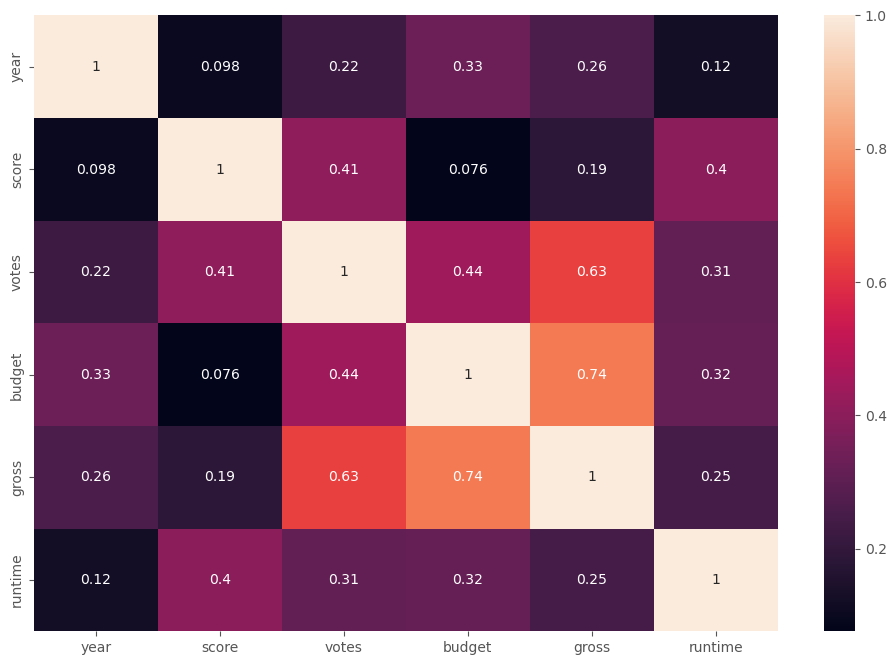

In [11]:
#Correlation of the numeric columns

correlation_matrix = movies.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [3]:
#Correlation of all columns

df_numerized = movies

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


In [4]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.023970,0.005533,0.009211,0.010392
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.176002,-0.107339,-0.032943,0.062145
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.356564,-0.235650,-0.071067,-0.052711
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.329321,0.257486,-0.010431,0.120811
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.014683,0.001659,-0.010474,0.000868
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.076254,0.186258,0.001030,0.399451
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.442429,0.630757,0.133204,0.309212
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.012272,-0.014441,0.004404,0.017624
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.039451,-0.023519,0.005646,-0.003511
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019589,-0.002717,0.012442,0.010174


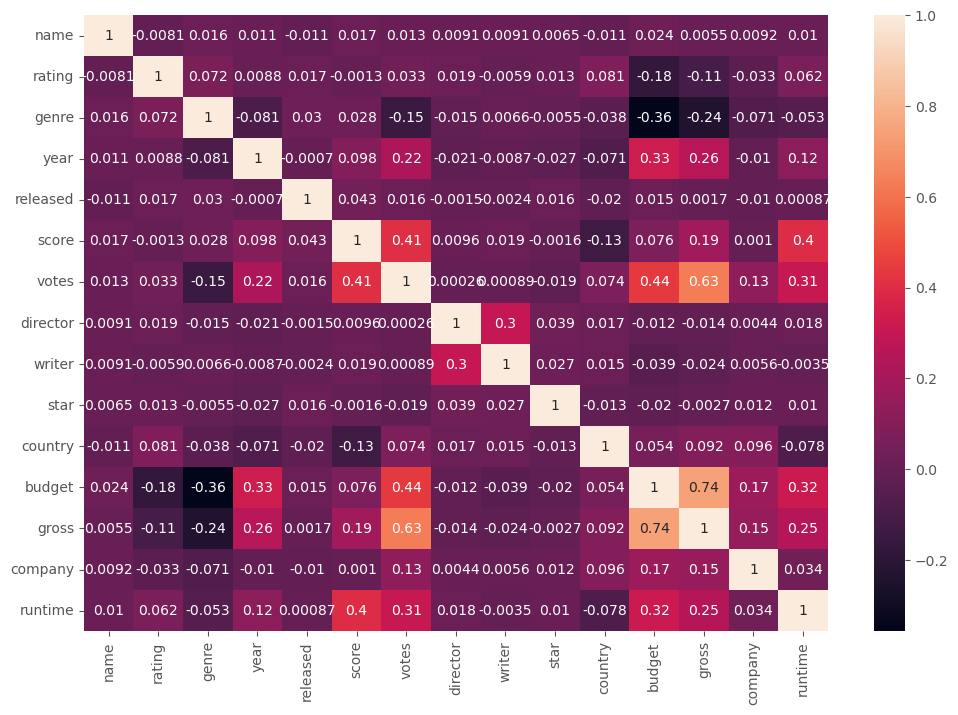

In [5]:
correlation_matrix = df_numerized.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [6]:
correlation_matrix = df_numerized.corr()
corr_pairs = correlation_matrix.unstack()
corr_pairs

name     name        1.000000
         rating     -0.008069
         genre       0.016355
         year        0.011453
         released   -0.011311
                       ...   
runtime  country    -0.078412
         budget      0.320447
         gross       0.245216
         company     0.034402
         runtime     1.000000
Length: 225, dtype: float64

In [12]:
sorted_pairs = corr_pairs.sort_values(ascending=False)
sorted_pairs

name      name        1.000000
rating    rating      1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
director  director    1.000000
runtime   runtime     1.000000
gross     budget      0.740395
budget    gross       0.740395
votes     gross       0.630757
gross     votes       0.630757
votes     budget      0.442429
budget    votes       0.442429
score     votes       0.409182
votes     score       0.409182
score     runtime     0.399451
runtime   score       0.399451
year      budget      0.329321
budget    year        0.329321
          runtime     0.320447
runtime   budget      0.320447
          votes       0.309212
votes     runtime     0.309212
director  writer      0.299067
writer  

In [10]:
high_corr = sorted_pairs[(sorted_pairs > 0.5)]
high_corr

name      name        1.000000
rating    rating      1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
director  director    1.000000
runtime   runtime     1.000000
gross     budget      0.740395
budget    gross       0.740395
votes     gross       0.630757
gross     votes       0.630757
dtype: float64

In [ ]:
# there's a high correlation between gross and budget and between votes and gross